# Lab: Fraud Detection in Wine Dataset using SVM with Grid Search

In this lab, you will be working on a dataset that contains wine types and their quality, classified as either "Legit" or "Fraud." Your task is to perform classification using Support Vector Machines (SVM) with hyperparameter tuning. You will complete several tasks to clean, preprocess, and analyze the data. Finally, you’ll evaluate the model's performance.

## Goal: 
To understand how to apply classification algorithms and perform model evaluation on imbalanced datasets.

## Dataset: wine_fraud.csv
This dataset includes the following columns:
- **type**: The type of wine (red or white).
- **quality**: The classification of the wine (Legit or Fraud).

## Task 1: Load the Dataset and Display the First Few Rows
**Instruction**: Load the dataset `wine_fraud.csv` into a DataFrame using Pandas and display the first five rows of data.

```python

In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\William\Desktop\SVM Lab Assignment\data\wine_fraud.csv')


print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

## Task 2: Explore the Target Variable (quality)

**Instruction**: Check the unique values in the target column `quality` to understand the classification types.

**Hint**: Use `.unique()` to display the distinct values in the column.

In [12]:
df['quality'].unique()


array(['Legit', 'Fraud'], dtype=object)

## Task 3: Plot the Distribution of Legit vs. Fraud Wines
**Instruction**: Create a countplot to display the number of wines classified as "Legit" vs. "Fraud."

**Hint**: Use Seaborn’s `countplot()` function.

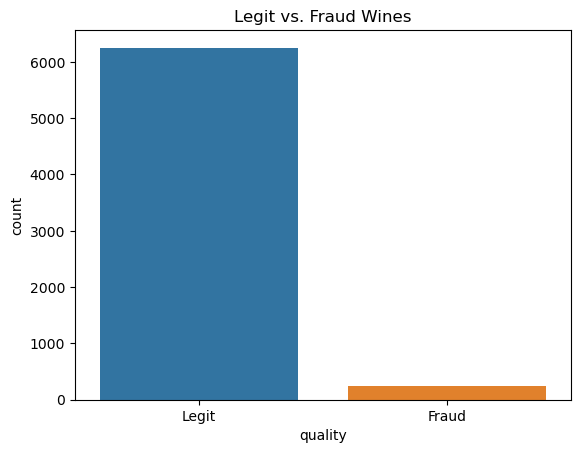

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='quality', data=df)
plt.title('Legit vs. Fraud Wines')
plt.show()


## Task 4: Create a Countplot of Wine Type and Quality
**Instruction**: Plot a countplot to show the distribution of wine type (red or white) and classify them by "Legit" or "Fraud" using hue.

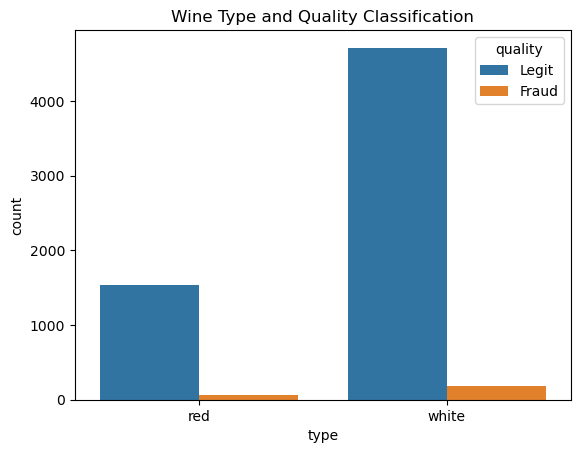

In [18]:
sns.countplot(x='type', hue='quality', data=df)
plt.title('Wine Type and Quality Classification')
plt.show()


## Task 5: Calculate the Percentage of Fraud in Red and White Wines
**Instruction**: Calculate the percentage of wines labeled as "Fraud" for both red and white wines and print out the percentage for each wine type.

**Hint**: Filter the dataset by type and calculate the percentage of fraud cases for each subset.


In [21]:
red_wine = df[df['type'] == 'red']
red_fraud_percentage = (red_wine['quality'] == 'Fraud').mean() * 100


white_wine = df[df['type'] == 'white']
white_fraud_percentage = (white_wine['quality'] == 'Fraud').mean() * 100

print(f'Red Wine Fraud Percentage: {red_fraud_percentage:.2f}%')
print(f'White Wine Fraud Percentage: {white_fraud_percentage:.2f}%')


Red Wine Fraud Percentage: 3.94%
White Wine Fraud Percentage: 3.74%


## Task 6: Convert the Quality Column into a Numeric Format
**Instruction**: Convert the target variable `quality` from "Legit" and "Fraud" to 0 and 1, respectively, for the classification task.

In [25]:
df['quality'] = df['quality'].map({'Legit': 0, 'Fraud': 1})


## Task 7: Convert the Type Column into Dummy Variables
**Instruction**: Convert the categorical column `type` into numerical values using Pandas’ `get_dummies()` function.

**Hint**: Use `drop_first=True` to avoid the dummy variable trap.

In [28]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


## Task 8: Split the Dataset into Features and Target Variables
**Instruction**: Separate the features (X) from the target variable (y). Drop the `quality` column from X, and assign y to the Fraud column.

In [31]:
X = df.drop('quality', axis=1)
y = df['quality']


## Task 9: Train-Test Split and Data Scaling
**Instruction**: Split the dataset into training and testing sets using an 80-20 split and random_state=42 </br>Then, use `StandardScaler` to scale the features in both the training and testing sets.

**Hint**: Use `train_test_split` from Scikit-learn.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Task 10: Train an SVM Model with Grid Search
**Instruction**: Use `GridSearchCV` to tune the SVM hyperparameters (C and gamma). Evaluate the best model using a confusion matrix and classification report.

- This code below uses GridSearchCV to find the best hyperparameters (C and gamma) for the SVM model and then evaluates the model using a confusion matrix and classification report.

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}

In [39]:
# Perform Grid Search with SVM
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto']})

In [40]:
# Get the best parameters
print("Best Parameters from GridSearchCV:")
print(grid.best_params_)

Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 'scale'}


In [47]:
# Make predictions using the best model
grid_predictions = grid.predict(X_test)

#### Print the Confusion Matrix

In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_predictions))


Confusion Matrix:
[[1117  134]
 [  21   28]]


#### Print the Classification Report

In [53]:
print("Classification Report:")
print(classification_report(y_test, grid_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1251
           1       0.17      0.57      0.27        49

    accuracy                           0.88      1300
   macro avg       0.58      0.73      0.60      1300
weighted avg       0.95      0.88      0.91      1300



### Explain the classification report result. What do the numbers tell you?

The classification report indicates that the SVM model performs well at identifying legitimate wines, with a precision of 0.98 and a recall of 0.89 for class 0 (Legit). This means that 98% of predicted legitimate wines are correct, but 11% of actual legitimate wines are misclassified as fraudulent. The F1-score for legitimate wines is strong at 0.94. In contrast, the model struggles with class 1 (Fraudulent wines), achieving a low precision of 0.17 and a recall of 0.57, indicating that only 17% of predicted fraudulent wines are actually fraudulent and that nearly half of actual fraudulent wines go undetected. The overall accuracy of the model is 0.88, but this can be misleading due to the imbalanced dataset, as the majority of wines are legitimate. The macro average scores reflect the model's poor performance on the minority class, while the weighted average scores are higher, influenced by the larger number of legitimate instances. Overall, the model effectively identifies legitimate wines but requires improvement in detecting fraudulent wines, suggesting the need for further tuning or different approaches to enhance detection capabilities.

## Critical Thinking Question
**Question**: Based on the results of the classification report, how well did the model handle the imbalanced dataset? 

Based on the results of the classification report, the model struggled to handle the imbalanced dataset effectively. While it demonstrated strong performance in identifying legitimate wines (class 0) with high precision (0.98) and recall (0.89), it failed to perform adequately on the minority class (class 1, Fraudulent wines). The low precision (0.17) and recall (0.57) for fraudulent wines indicate that the model had a high rate of false positives and missed a significant number of actual fraudulent cases. This disparity highlights a common challenge in dealing with imbalanced datasets, where the model can become biased toward the majority class. The overall accuracy of 0.88 can be misleading, as it does not reflect the model's ineffectiveness in detecting the minority class. To improve performance on the imbalanced dataset, strategies such as oversampling the minority class, using different algorithms, or applying techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be explored to enhance the model's ability to identify fraudulent wines more accurately.